<img src="twitter.png" alt="Drawing" style="width: 100px;"/> 
    <br><br>
<center>
    Example workbook for basic data science using the Twitter API. For more information view the <a href="https://github.com/kris-nova/easy-twitter-data-science">project on github.</a>
<br>
    <b>Author</b>: Kris Childress <a href=mailto:kris@nivenly.com>kris@nivenly.com</a>

</center>

<b>[Credentials]</b>
<ol>
  <li>A valid Twitter app is required.</li>
  <li><a href="https://apps.twitter.com/app/new">Create</a> a new app if you don't have one already.</li>
  <li>Generate an access token for your app if you don't have one already.</li>
</ol> 

In [1]:
# Define your unique twitter app credentials here
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""

<b>[Init and Stream]</b> <br>
This will init a multi-threaded stream to the Twitter API.

In [2]:
%matplotlib inline
import sys
sys.path.append('../')
from tweepy import OAuthHandler
from tweepy import Stream
from Twitter import Runtime
from Twitter import InMemory
import matplotlib.pyplot as plt
import numpy as np
import json
import datetime
import time
tweets = InMemory.Tweets()
listener = Runtime.Listener(tweets)
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, listener)

<b>[Filter]</b> <br>
Filter all of your tweets by a list of keywords. <br>
<i>Note: async=True should not be changed</i>

In [3]:
stream.filter(track=["lesbian"], async=True)

<b>[Plot]</b> <br>
Now we have a buffer of tweets in memory, we can play with the data here.

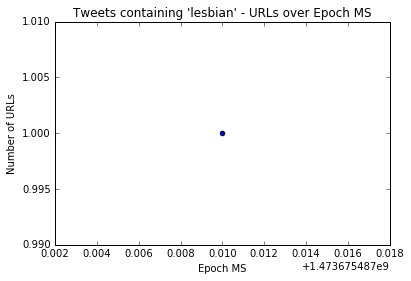

In [4]:
# Get our current tweets in the buffer
data = tweets.get_list()
raw = {}
# Loop over tweets and build our data sets
for created_at in data:
    # This tweet
    tweet = data[created_at]

    # Created At
    dt = datetime.datetime.strptime(created_at, '%a %b %d %H:%M:%S +0000 %Y')
    x = int(time.mktime(dt.timetuple()))
    
    # Number of URLs
    y = int(len(tweet['entities']['urls']))
    
    # X and Y values must b Integers
    plt.scatter(x,y)
    raw[x] = y
        
# Graph settings
plt.title("Tweets containing 'lesbian' - URLs over Epoch MS")
plt.xlabel('Epoch MS')
plt.ylabel('Number of URLs')

# Build the graph
plt.show()


<b>[Raw Data Set]</b> <br>
The raw data from above

In [5]:
# Comment this out to turn this on/off
for r in raw:
    x = r
    y = raw[x]
    print x, y

1473675487 1


<b>[Example Payload]</b> <br>
In case you need to see what a Tweet looks like

In [7]:
str = json.dumps(tweets.get_tweet(), indent=2, sort_keys=True)

# Comment this out to turn this on/off
#print str